# Create a DynamoDB table:
For instructions on how to create a DynamoDB table, go to my AWS repo and read the following file: [DynamoDB/How to create a DynamoDB table.ipynb](https://github.com/DataScientistMSBA/AWS/blob/main/DynamoDB/How%20to%20create%20a%20DynamoDB%20table.ipynb)

Please not that you will like need to add the **AmazonDynamoDBFullAccess** permissions to the **main** role.

# Create a Lambda function:
For instructions on how to create a Lambda function, go to my AWS repo and read the following file: [Lambda/How to create a Lambda function.ipynb](https://github.com/DataScientistMSBA/AWS/blob/main/Lambda/How%20to%20create%20a%20Lambda%20function.ipynb)

Please note, that you will likely need to set the **main** **Role** permissions to include the **AWSLambda_FullAccess** **policy**.

When you get to the **Function overview** section, select **+ Add trigger** and then select **Kinesis**.

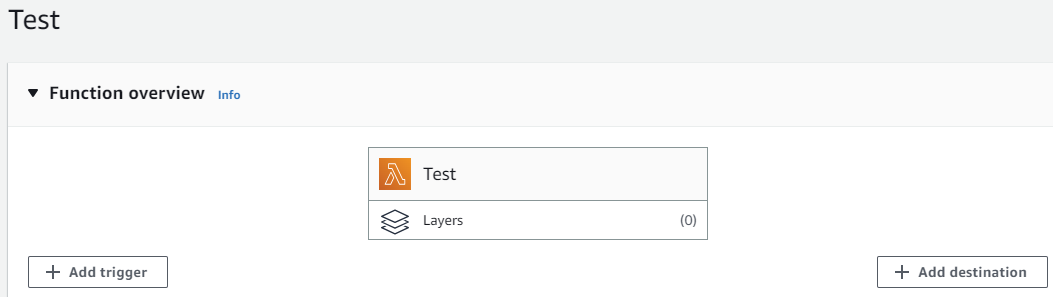

Select the appropriate **Kinesis stream** and make and addition customizations as needed. Then select **Add**.

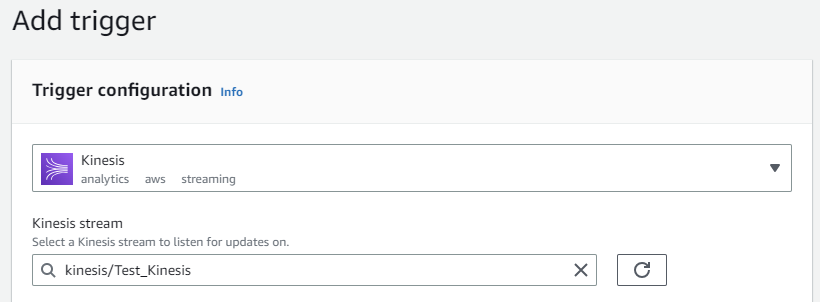

**Note:** You may receive an error regarding a permission boundary. This can be solve by adding **AmazonKinesisFullAccess** to the associate **Role**. Though it would be wiser to customize the role to only the absolute required permissions.

Next, click on the **Layers** icon and scroll down to the **Code source** and enter the below Python code into the window pane and then select **Deploy**. Make sure to update the **Table name** in the script (here it is shown as **TestTable** which was defined in DynamoDB).

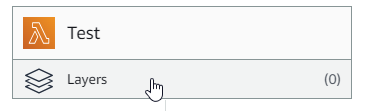

import base64
import json
##python lib for aws
import boto3
import datetime


def lambda_handler(event, context):
    """
    Receive a batch of events from Kinesis and insert into  DynamoDB table
    
    """

    try: 
        ##resource assigned from boto library
        dynamo_db = boto3.resource('dynamodb')
        ##dynamoDB table name
        table = dynamo_db.Table('TestTable')
        
        for record in event["Records"]:
            decoded_data = base64.b64decode(record["kinesis"]["data"]).decode("utf-8")
            print(decoded_data)
            print(json.loads(decoded_data))
            decoded_data_dic = json.loads(decoded_data)
            with table.batch_writer() as batch_writer:
                batch_writer.put_item(Item=decoded_data_dic)
       
    except Exception as e: 
        print(str(e))

There is one last step that **must** be addressed in order for this to work. If you click on the **Kinesis** trigger, it will bring you to the **Configuration** page. You may notice that the **state: Disabled**.

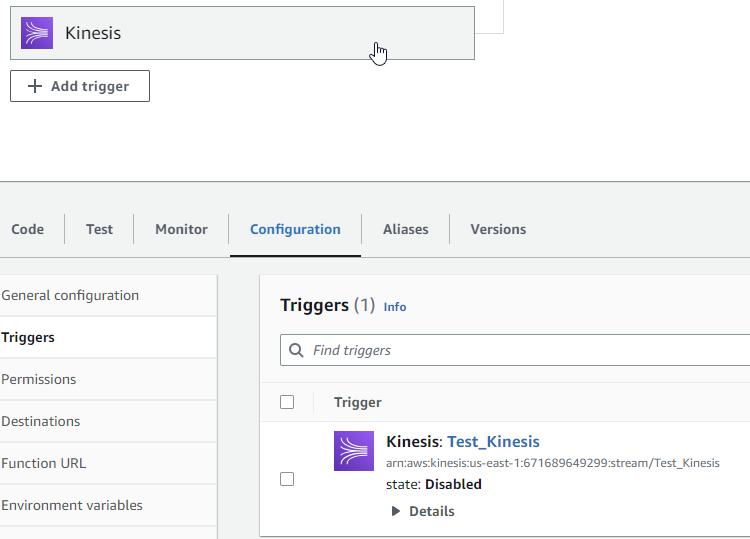

In order to fix this, you must select the records and select **Edit**. In the next menu, select **Activate trigger** and then **Save**.

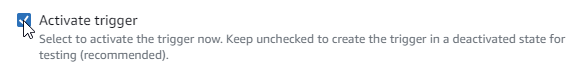

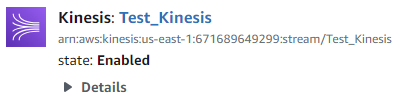

You can exit the **Lambda** module and run the script found in my AWS repo under [Kinesis/How to send records to the Kinesis Data Stream using Python.ipynb](https://github.com/DataScientistMSBA/AWS/blob/main/Kinesis/How%20to%20send%20records%20to%20the%20Kinesis%20Data%20Stream%20using%20Python.ipynb). This can be conducted in Databricks and may require some packages purposefully hidden in my PreLoads workbook.

Now, there may be a slight delay, but if you now go into **DynamoDB** and select **Explore items** from the left-hand menu, you will soon see the records being populated in the table.

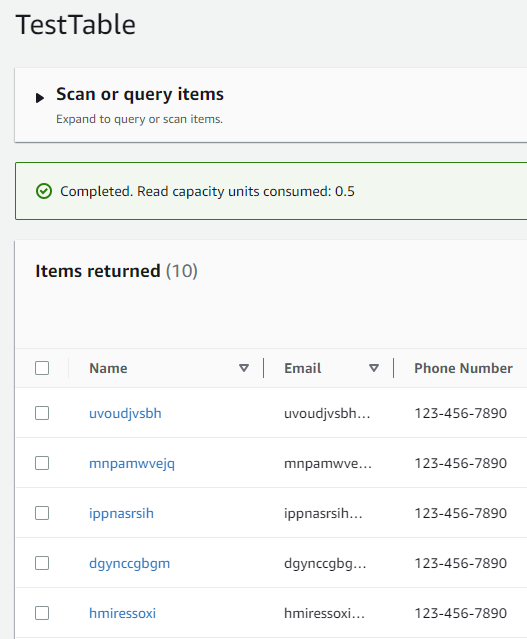